## Pandas 4: Time Series

Problem 1:

In [5]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [267]:
djia = pd.read_csv('DJIA.csv', index_col='DATE', na_values=['.'])
djia.index = pd.to_datetime(djia.index)
djia = djia.fillna(np.nan)
djia = djia.astype(float)
djia = djia.dropna()

Problem 2:

In [69]:
def paychecks_index():
    f3 = pd.date_range(start='03/13/2008', periods=47, freq='WOM-3FRI')
    f1 = pd.date_range(start='03/13/2008', periods=46, freq='WOM-1FRI')
    i = f1.union(f3)
    
    pchecks = pd.read_csv('paychecks.csv', header=None, )
    pchecks.index = i
    

In [70]:
paychecks_index()

Problem 3:

In [108]:
def load_finances():
    p = pd.period_range("1978Q1", "1998Q4", freq="Q-FEB")
    findata = pd.read_csv('finances.csv')
    findata.index = p   

In [109]:
load_finances()

         EARNINGS   EXPENSES
1978Q1  372572.16  122611.27
1978Q2  419440.58  133176.18
1978Q3  419766.49  154670.69
1978Q4  361453.31  209360.42
1979Q1  354463.33  174147.13


Problem 5:

In [167]:
def traffic():
    df = pd.read_csv('website_traffic.csv')
    df = df.drop('IP', axis=1)
    
    
    df['ENTER'] = pd.to_datetime(df['ENTER'])
    df['LEAVE'] = pd.to_datetime(df['LEAVE'])
    df['DURATION'] = (df['LEAVE'] - df['ENTER'])
    df.index = df['ENTER']
    df = df.drop(['ENTER', 'LEAVE'], axis=1)

    # is there a straightforward way to convert time differences to decimals?
    #(i.e. not splitting up the time difference into hours/minute/seconds
    # components then multiplying
    
    #TODO: this doesn't work with datetime objects
    #daily = df.resample('D').mean()

    
    

In [168]:
traffic()

Problem 6:

In [210]:
daily_delt = djia - djia.shift(1)
max_gain_d = daily_delt.max(0)
max_gain_index = daily_delt.idxmax(0)[0].strftime("%d %b, %Y")
max_loss_d = daily_delt.min(0)
max_loss_index = daily_delt.idxmax(0)[0].strftime("%d %b, %Y")


print("Largest daily gain was", int(max_gain_d), "on", max_gain_index, "\n")
print("Larges daily loss was", int(max_loss_d), "on", max_loss_index, "\n")

monthly_delt = daily_delt.resample('M').sum()
max_gain_m = monthly_delt.max(0)
max_gain_m_index = monthly_delt.idxmax(0)[0].strftime("%B %Y")
max_loss_m = monthly_delt.min(0)
max_loss_m_index = monthly_delt.idxmin(0)[0].strftime("%B %Y")

print("Largest monthly gain was", int(max_gain_m), "in", max_gain_m_index, "\n")
print("Larges monthly loss was", int(max_loss_m), "in", max_loss_m_index, "\n")

Largest daily gain was 936 on 13 Oct, 2008 

Larges daily loss was -777 on 13 Oct, 2008 

Largest monthly gain was 1378 in October 2015 

Larges monthly loss was -1525 in October 2008 



Problem 7:

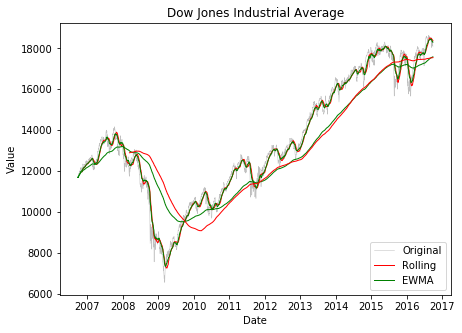

In [296]:
plt.figure(figsize=(7,5))

plt.title("Dow Jones Industrial Average")
plt.xlabel("Date")
plt.ylabel("Value")

avg_30 = djia.rolling(window=30).mean()
avg_365 = djia.rolling(window=365).mean()
ewma_30 = djia.ewm(span=30).mean()
ewma_365 = djia.ewm(span=365).mean()

plt.plot(djia, color='0.75', lw=0.5, label="Original",zorder=1)
plt.plot(avg_30, label="Rolling", lw=1, color='r', zorder=2)
plt.plot(avg_365, lw=1, color='r', zorder=10)
plt.plot(ewma_30, label="EWMA", lw=1, color='g')
plt.plot(ewma_365, lw=1, color='g')


plt.legend(loc='lower right')
plt.show()